In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
import scipy.stats as stats




base_dir = os.path.normpath('G:/My Drive/Crick_LMS/projects/diverse_yeasts/alphafold')

In [2]:
#alignment comparison data
aln_comparisons_fname = base_dir + os.sep + os.path.normpath('msas/sequence/jacobs_analysis/info_content.txt')
aln_comparisons = pd.read_table(aln_comparisons_fname, sep = ' ')
aln_comparisons['value']=pd.to_numeric(aln_comparisons['value'], errors='coerce') 

#Conservation data
scores_mapped = pd.read_table(base_dir + os.sep + os.path.normpath('Output/Matrices/Scores_Mapped.tsv'), index_col = 0)
params_to_plot_mapped = ['Mean(Conservation Rate) [ALL]', 'CV(Type Conservation Rate) [ALL]', 'Mean(Type Conservation Rate) [ALL]', 'CV(Conservation Rate) [ALL]']
scores_mapped_subset = scores_mapped.loc[:,params_to_plot_mapped]

# #Jacob's old alignment comparison data
# aln_comparisons_fname_jacob_old = base_dir + os.sep + os.path.normpath('msas/sequence/jacobs_analysis/03_info_content_res_clean.txt')
# aln_comparisons_jacob_old = pd.read_table(aln_comparisons_fname_jacob_old, header=None)
# aln_comparisons_jacob_old.columns = ['metric','value','og','aln_type','metric_type','og_ref_full']

# #alignment comparison data
# aln_comparisons_fname = base_dir + os.sep + os.path.normpath('msas/aln_tree_quantities.txt')
# aln_comparisons = pd.read_table(aln_comparisons_fname, header=None)
# aln_comparisons.columns = ['metric','value','og','aln_type','metric_type','og_ref']

In [3]:
set(aln_comparisons['metric'])

{'abs',
 'aln_len',
 'avg_inter_branch_len',
 'avg_lbs',
 'avg_pairwise_id',
 'avg_pd',
 'avg_term_branch_len',
 'dvmc',
 'evo_rate',
 'percent_pi_sites',
 'percent_var_sites',
 'rcv',
 'saturation',
 'tness',
 'tor',
 'tree_len'}

In [4]:
cols_to_keep = ['value','gene']
metrics = ['saturation', 'tness', 'aln_len', 'percent_pi_sites', 'percent_var_sites', 'rcv', 'evo_rate', 'tree_len']
strategies = ['tm_align','mafft','clustalo']

aln_comparisons_dict = {}
for metric in metrics:
    aln_comp_metric_full = aln_comparisons[aln_comparisons['metric']==metric].copy()
    #aln_comp_metric_full['og_ref'] = [og_ref_full.split('/')[1].split('.')[0] for og_ref_full in aln_comp_metric_full['og_ref_full']]

    aln_comp_metric_type_0 = aln_comp_metric_full.loc[(aln_comp_metric_full['strategy']==strategies[0]), cols_to_keep]
    aln_comp_metric_type_0.rename(columns={'value':'value_'+strategies[0]},inplace=True)
    for strategy in strategies[1:]: 
#         print(jj)
#         print(aln_type)
        aln_comp_metric_type_1 = aln_comp_metric_full.loc[(aln_comp_metric_full['strategy']==strategy), cols_to_keep]
        aln_comp_metric_type_1.rename(columns={'value':'value_'+strategy}, inplace=True)
    #         if jj==0:
#             suffixes = ('_'+aln_types[0], '_' + aln_type)
#         else: 
#             suffixes =  ('', '_' + aln_type)
#         print(suffixes)
        aln_comp_metric_type_0 = aln_comp_metric_type_0.merge(aln_comp_metric_type_1, on='gene',how='outer')
    
    aln_comp_metric = aln_comp_metric_type_0
    
#     og_ref_new = []
#     for og_ref_old in aln_comp_metric['og_ref']:
#         og_ref_old_sp = og_ref_old.split('__')
#         og_ref_new.append(og_ref_old_sp[0] + '_REF_' + og_ref_old_sp[1])
    
#     aln_comp_metric['og_ref_new'] = og_ref_new
    
    aln_comp_metric = aln_comp_metric.merge(scores_mapped_subset, how = 'inner', left_on='gene', right_index=True)
    #aln_comp_metric = aln_comp_metric.merge(aln_comparisons_jacob_dict[metric], how = 'outer',on='og_ref', suffixes = ('','_jacob'))
    
    aln_comparisons_dict[metric] = aln_comp_metric
        

In [19]:
#aln_comparisons_dict['treeness'].to_csv(base_dir + os.sep + os.path.normpath('msas/sequence/jacobs_analysis/jacobs_analysis_treeness.csv'))
#aln_comparisons_dict['saturation'].to_csv(base_dir + os.sep + os.path.normpath('msas/sequence/jacobs_analysis/jacobs_analysis_saturation.csv'))

In [59]:
#aln_comparisons_dict['treeness'][((aln_comparisons_dict['treeness']['value_struct_tmalign']-0.07) > aln_comparisons_dict['treeness']['value_seq_mafft'])]

,value_struct_tmalign,og_ref,value_seq_mafft,value_seq_clustalo,Mean(Conservation Rate) [ALL],CV(Type Conservation Rate) [ALL],Mean(Type Conservation Rate) [ALL],CV(Conservation Rate) [ALL],value_struct,og_ref_jacob,value_seq
28,0.2861,OG3008_REF_Scer_AF-P36076-F1-model_v2,0.2031,0.2633,0.630016,0.141583,0.775673,0.161163,0.1787,OG3008__Scer_AF-P36076-F1-model_v2,0.1695
80,0.2378,OG1758_REF_Scer_AF-Q03529-F1-model_v2,0.1673,0.1735,0.646734,0.068689,0.774014,0.114179,0.2198,OG1758__Scer_AF-Q03529-F1-model_v2,0.1890
96,0.3936,OG3681_REF_Scer_AF-Q07560-F1-model_v2,0.3072,0.3300,0.488641,0.083063,0.716911,0.132329,0.3272,OG3681__Scer_AF-Q07560-F1-model_v2,0.3139
114,0.3160,OG1597_REF_Scer_AF-P47169-F1-model_v2,0.1581,0.1619,0.548141,0.191040,0.686532,0.274545,0.2385,OG1597__Scer_AF-P47169-F1-model_v2,0.1284
200,0.3355,OG1825_REF_Scer_AF-P07244-F1-model_v2,0.2003,0.1997,0.589589,0.044791,0.708489,0.061748,0.3622,OG1825__Scer_AF-P07244-F1-model_v2,0.0856
291,0.2545,OG3048_REF_Scer_AF-Q02784-F1-model_v2,0.1679,0.2041,0.751075,0.060626,0.853364,0.080148,0.2418,OG3048__Scer_AF-Q02784-F1-model_v2,0.0996
304,0.3080,OG1329_REF_Scer_AF-P17709-F1-model_v2,0.2240,0.2132,0.615073,0.105187,0.749901,0.179802,0.2242,OG1329__Scer_AF-P17709-F1-model_v2,0.1833


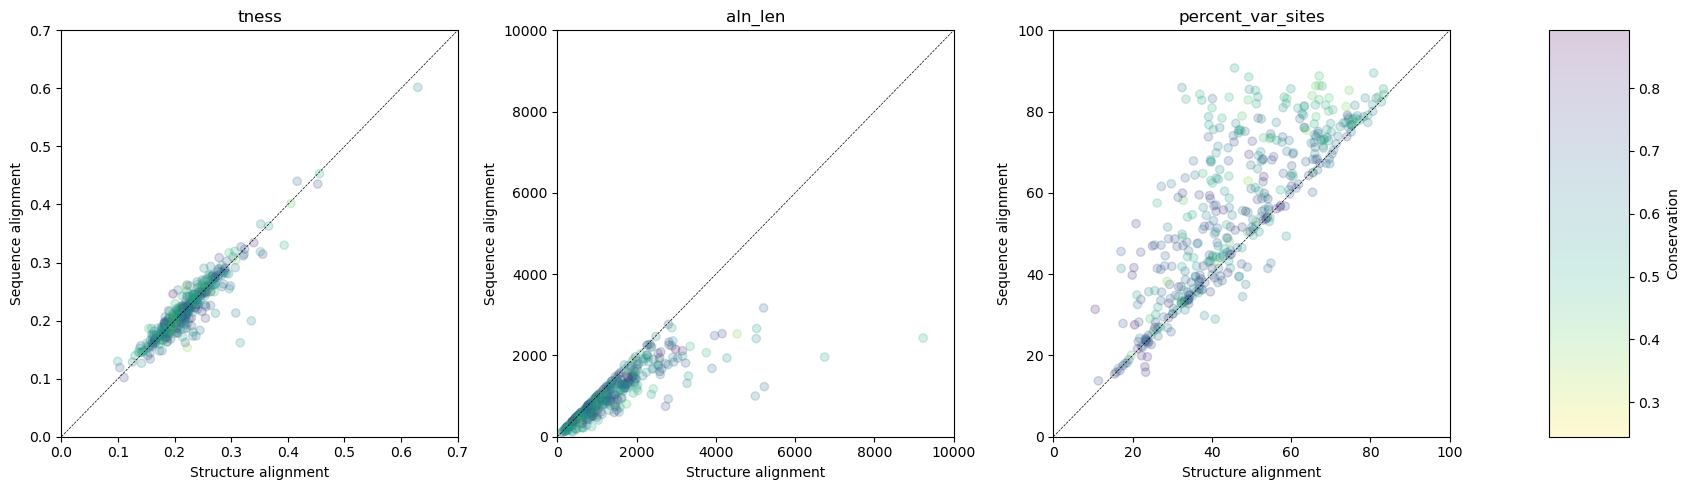

In [9]:
metrics_fig = ['tness', 'aln_len', 'percent_var_sites']
fig = plt.figure(figsize=(5*len(metrics_fig)+2, 5)) 
gs = gridspec.GridSpec(1, len(metrics_fig)+1, width_ratios=[5 for jj in range(len(metrics_fig))] + [1]) 
#fig,axarr = plt.subplots(1,3, figsize = (9,4), width_ratios = [5,5,1])

ranges = {'saturation': [-0.1,1.1],
          'tness': [0,0.7], 
          'percent_pi_sites': [0,100],
          'percent_var_sites': [0,100],
          'rcv': [0,0.3], 
          'aln_len': [0,10000]}

vmin = min(scores_mapped_subset['Mean(Conservation Rate) [ALL]'])
vmax = max(scores_mapped_subset['Mean(Conservation Rate) [ALL]'])

for jj, metric in enumerate(metrics_fig): 
    ax = plt.subplot(gs[jj])
    data_to_plot = aln_comparisons_dict[metric]
    data_plt = ax.scatter(data_to_plot['value_tm_align'], data_to_plot['value_clustalo'], alpha = 0.2, c = data_to_plot['Mean(Conservation Rate) [ALL]'], cmap = 'viridis_r', vmin = vmin, vmax = vmax)
    ax.set_title(metric)
    ax.set_xlabel('Structure alignment')
    ax.set_ylabel('Sequence alignment')
    ax.plot(ranges[metric],ranges[metric],color='k',linestyle = '--', linewidth = 0.5)
    ax.set_xlim(ranges[metric])
    ax.set_ylim(ranges[metric])


ax = plt.subplot(gs[len(metrics_fig)])
plt.colorbar(data_plt, cax=ax, label='Conservation')
fig.tight_layout()    

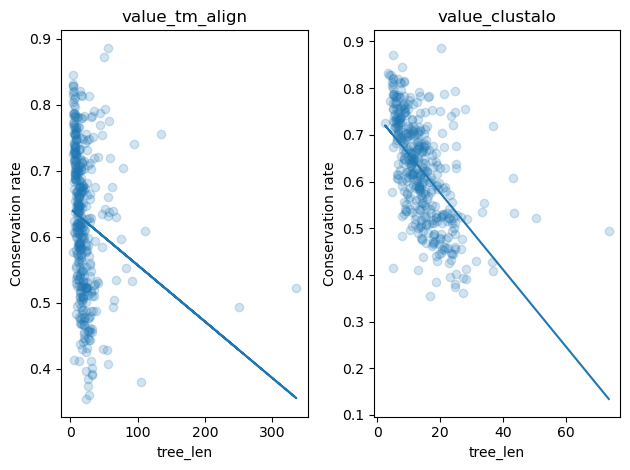

In [33]:
fig, axarr = plt.subplots(1,2)

metric = 'tree_len' #'tree_len'#'rcv'
data_to_plot = aln_comparisons_dict[metric]
for jj, strategy in enumerate(['value_tm_align', 'value_clustalo']):
    ax = axarr[jj]
    #obtain m (slope) and b(intercept) of linear regression line
    x = data_to_plot[strategy]
    y = data_to_plot['Mean(Conservation Rate) [ALL]']
    
    
    ax.set_title(strategy)
    ax.set_xlabel(metric)
    ax.set_ylabel('Conservation rate')
    ax.scatter(x, y, alpha = 0.2)

    #add linear regression line to scatterplot 
    m, b = np.polyfit(x, y, 1)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    ax.plot(x, m*x+b)
    

fig.tight_layout()


In [38]:
help('FORMATTING')

Format String Syntax
********************

The "str.format()" method and the "Formatter" class share the same
syntax for format strings (although in the case of "Formatter",
subclasses can define their own format string syntax).  The syntax is
related to that of formatted string literals, but it is less
sophisticated and, in particular, does not support arbitrary
expressions.

Format strings contain “replacement fields” surrounded by curly braces
"{}". Anything that is not contained in braces is considered literal
text, which is copied unchanged to the output.  If you need to include
a brace character in the literal text, it can be escaped by doubling:
"{{" and "}}".

The grammar for a replacement field is as follows:

      replacement_field ::= "{" [field_name] ["!" conversion] [":" format_spec] "}"
      field_name        ::= arg_name ("." attribute_name | "[" element_index "]")*
      arg_name          ::= [identifier | digit+]
      attribute_name    ::= identifier
      element_i

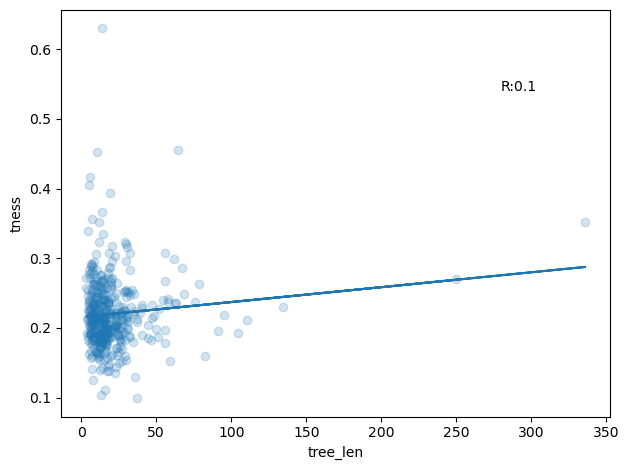

In [46]:
fig, ax = plt.subplots()

x_metric = 'tree_len'
y_metric = 'tness' # 'evo_rate'
strategy = 'value_tm_align'

x = aln_comparisons_dict[x_metric][strategy]
y = aln_comparisons_dict[y_metric][strategy]

#ax.set_title(strategy)
ax.set_xlabel(x_metric)
ax.set_ylabel(y_metric)
ax.scatter(x, y, alpha = 0.2)

#linear regression fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax.text(0.8, 0.8, 'R:{:0.2}'.format(r_value), transform=ax.transAxes)
ax.plot(x, slope*x+intercept)
    

fig.tight_layout()


In [45]:
# What orthogroups have evo_rate greater than 2
aln_comparisons_dict['evo_rate'][aln_comparisons_dict['evo_rate']['value_tm_align']>2.0]


,value_tm_align,gene,value_mafft,value_clustalo,Mean(Conservation Rate) [ALL],CV(Type Conservation Rate) [ALL],Mean(Type Conservation Rate) [ALL],CV(Conservation Rate) [ALL]
0,2.7480,OG1004_REF_Scer_AF-P15938-F1-model_v2,0.8136,0.8093,0.493276,0.108358,0.677553,0.167097
2,5.8946,OG1012_REF_Scer_AF-P08004-F1-model_v2,0.8133,0.8863,0.522475,0.105072,0.694814,0.185138
15,2.4444,OG1070_REF_Scer_AF-P21524-F1-model_v2,0.5212,0.6036,0.740618,0.078631,0.845978,0.131114
41,2.5226,OG1242_REF_Scer_AF-P36107-F1-model_v2,0.5670,0.6605,0.596392,0.136128,0.738599,0.198691
42,2.0737,OG1254_REF_Scer_AF-P40395-F1-model_v2,1.4093,1.5275,0.354468,0.168250,0.572760,0.290056
56,3.3855,OG1318_REF_Scer_AF-Q06147-F1-model_v2,1.6266,1.6168,0.533361,0.136235,0.714079,0.217032
72,4.0926,OG1414_REF_Scer_AF-P06700-F1-model_v2,1.7339,1.6015,0.608546,0.089603,0.748700,0.150991
92,2.9432,OG1498_REF_Scer_AF-Q06702-F1-model_v2,1.5957,1.2186,0.553250,0.121703,0.705826,0.167117
94,2.1467,OG1502_REF_Scer_AF-P33300-F1-model_v2,0.8284,0.6878,0.631723,0.097693,0.760636,0.144870
112,2.2692,OG1622_REF_Scer_AF-P15274-F1-model_v2,1.3333,1.4113,0.719986,0.085456,0.829352,0.132390


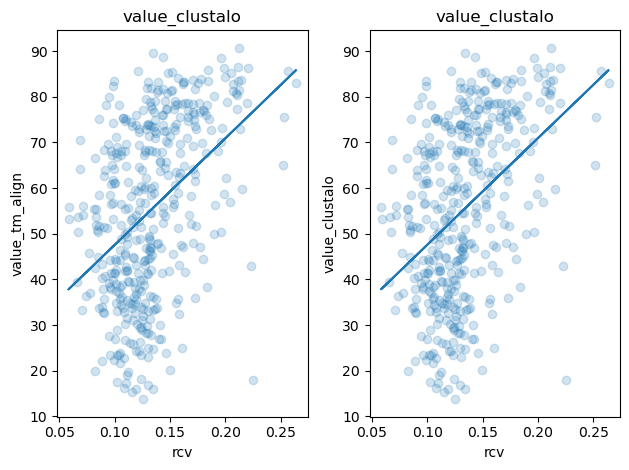

In [53]:
fig, axarr = plt.subplots(1,2)

metric1 = 'rcv'
data_to_plot1 = aln_comparisons_dict[metric1]
metric2 = 'percent_var_sites'
data_to_plot2 = aln_comparisons_dict[metric2]
for jj, metric2 in enumerate(['value_tm_align', 'value_clustalo']):
    ax = axarr[jj]
    #obtain m (slope) and b(intercept) of linear regression line
    x = data_to_plot1[strategy]
    y = data_to_plot2[strategy]
    
    
    ax.set_title(strategy)
    ax.set_xlabel(metric1)
    ax.set_ylabel(metric2)
    ax.scatter(x, y, alpha = 0.2)

    #add linear regression line to scatterplot 
    m, b = np.polyfit(x, y, 1)

    ax.plot(x, m*x+b)
    

fig.tight_layout()

In [6]:
aln_comparisons_dict['treeness'].keys()

Index(['value_struct_tmalign', 'og_ref', 'value_seq_mafft',
       'value_seq_clustalo', 'Mean(Conservation Rate) [ALL]',
       'CV(Type Conservation Rate) [ALL]',
       'Mean(Type Conservation Rate) [ALL]', 'CV(Conservation Rate) [ALL]',
       'value_struct', 'og_ref_jacob', 'value_seq'],
      dtype='object')

Text(0.5, 0.9, 'treeness')

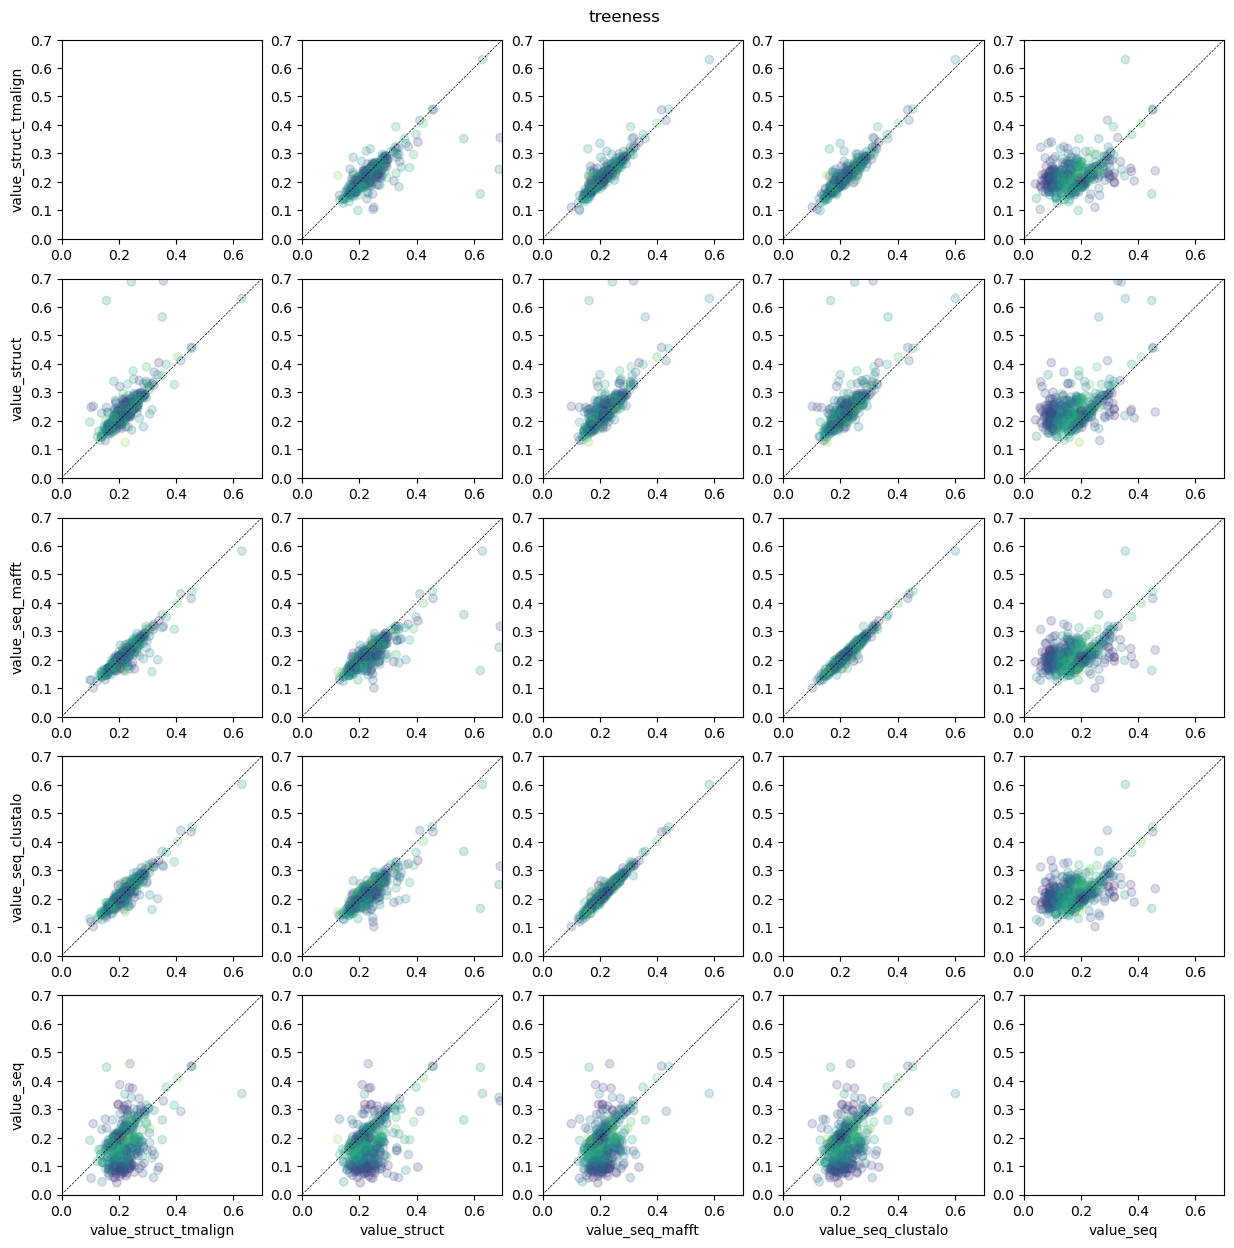

In [21]:
# fig = plt.figure(figsize=(12, 5)) 
# gs = gridspec.GridSpec(1, 3, width_ratios=[5,5,1]) 
aln_list = ['value_struct_tmalign','value_struct','value_seq_mafft','value_seq_clustalo','value_seq']
metric = 'treeness'
data_to_plot = aln_comparisons_dict[metric]

fig,axarr = plt.subplots(len(aln_list),len(aln_list), figsize = (15,15))

ranges = {'saturation': [-0.1,1.1],
          'treeness': [0,0.7]}

vmin = min(scores_mapped_subset['Mean(Conservation Rate) [ALL]'])
vmax = max(scores_mapped_subset['Mean(Conservation Rate) [ALL]'])

for jj, aln_x in enumerate(aln_list): 
    for kk, aln_y in enumerate(aln_list):
        ax = axarr[kk][jj]
        ax.set_xlim(ranges[metric])
        ax.set_ylim(ranges[metric])
        if jj==0: 
            ax.set_ylabel(aln_y)
        if kk==(len(aln_list)-1):
            ax.set_xlabel(aln_x)
        if jj!=kk: 
            
            data_plt = ax.scatter(data_to_plot[aln_x], data_to_plot[aln_y], alpha = 0.2, c = data_to_plot['Mean(Conservation Rate) [ALL]'], cmap = 'viridis_r', vmin = vmin, vmax = vmax)
            ax.plot(ranges[metric],ranges[metric],color='k',linestyle = '--', linewidth = 0.5)


plt.suptitle(metric, y=0.9)
# ax = plt.subplot(gs[2])
# plt.colorbar(data_plt, cax=ax, label='Conservation')

In [25]:
list(aln_comp_metric_full['og_ref_full'])[0]

'fasta_renamed_seq_filt/OG1004__Scer_AF-P15938-F1-model_v2.seq_filt.fasta'

In [26]:
og_ref_full = 'fasta_renamed_seq_filt/OG1004__Scer_AF-P15938-F1-model_v2.seq_filt.fasta'


'OG1004__Scer_AF-P15938-F1-model_v2'

C:\Users\heineib\Anaconda3\envs\sc_seq_py\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,value_seq,og_seq,og_ref,value_struct,og_struct
0,0.1940,OG1004,OG1004__Scer_AF-P15938-F1-model_v2,0.1940,OG1004
1,0.2031,OG1004,OG1004__Scer_AF-P20095-F1-model_v2,0.2031,OG1004
2,0.2001,OG1004,OG1004__Scer_AF-P24384-F1-model_v2,0.2001,OG1004
3,0.6598,OG1004,OG1004__Scer_AF-P40459-F1-model_v2,0.6598,OG1004
4,0.1853,OG1004,OG1004__Scer_AF-P53131-F1-model_v2,0.1853,OG1004
...,...,...,...,...,...
521,0.2874,OG5327,OG5327__Scer_AF-P43635-F1-model_v2,0.2874,OG5327
522,0.9746,OG5404,OG5404__Scer_AF-P06115-F1-model_v2,0.9746,OG5404
523,0.5896,OG5441,OG5441__Scer_AF-P00724-F1-model_v2,0.5896,OG5441
524,0.8135,OG5490,OG5490__Scer_AF-P32340-F1-model_v2,0.8135,OG5490


In [16]:
aln_comparisons.loc[aln_comparisons_grouped.groups['saturation'],:]

,0,1,2,3,4,5
14,saturation,0.1940,OG1004,seq,tree_and_aln,fasta_renamed_seq_filt/OG1004__Scer_AF-P15938-...
30,saturation,0.2031,OG1004,seq,tree_and_aln,fasta_renamed_seq_filt/OG1004__Scer_AF-P20095-...
46,saturation,0.2001,OG1004,seq,tree_and_aln,fasta_renamed_seq_filt/OG1004__Scer_AF-P24384-...
62,saturation,0.6598,OG1004,seq,tree_and_aln,fasta_renamed_seq_filt/OG1004__Scer_AF-P40459-...
78,saturation,0.1853,OG1004,seq,tree_and_aln,fasta_renamed_seq_filt/OG1004__Scer_AF-P53131-...
...,...,...,...,...,...,...
16866,saturation,0.7904,OG5327,struct,tree_and_aln,fasta_renamed_struct_filt/OG5327__Scer_AF-P436...
16882,saturation,0.6617,OG5404,struct,tree_and_aln,fasta_renamed_struct_filt/OG5404__Scer_AF-P061...
16898,saturation,0.6987,OG5441,struct,tree_and_aln,fasta_renamed_struct_filt/OG5441__Scer_AF-P007...
16914,saturation,0.6546,OG5490,struct,tree_and_aln,fasta_renamed_struct_filt/OG5490__Scer_AF-P323...


In [13]:
struct_seq_alnstruct_seq_aln_comparisons_grouped.groups['saturation']

Int64Index([   14,    30,    46,    62,    78,    94,   110,   126,   142,
              158,
            ...
            16786, 16802, 16818, 16834, 16850, 16866, 16882, 16898, 16914,
            16930],
           dtype='int64', length=1052)

In [3]:
#Jacob's alignment comparisons
cols_to_keep = ['value','og_ref_jacob']
metrics = ['saturation', 'treeness']
aln_types = ['struct','seq']

aln_comparisons_jacob_dict = {}
for metric in metrics:
    aln_comp_jacob_metric_full = aln_comparisons_jacob[aln_comparisons_jacob['metric']==metric].copy()
    aln_comp_jacob_metric_full['og_ref_jacob'] = [og_ref_full.split('/')[1].split('.')[0] for og_ref_full in aln_comp_jacob_metric_full['og_ref_full']]

#     aln_comp_jacob_metric_type_0 = aln_comp_jacob_metric_full.loc[(aln_comp_jacob_metric_full['aln_type']==aln_types[0]), cols_to_keep]
#     for (jj, aln_type) in enumerate(aln_types[1:]): 
#         print(jj)
#         print(aln_type)
#         aln_comp_metric_type_1 = aln_comp_metric_full.loc[(aln_comp_metric_full['aln_type']==aln_type), cols_to_keep]
#         if jj==0:
#             suffixes = ('_'+aln_types[0], '_' + aln_type)
#         else: 
#             suffixes =  ('', '_' + aln_type)
#         print(suffixes)
    aln_comp_jacob_metric_type_0 = aln_comp_jacob_metric_full.loc[(aln_comp_jacob_metric_full['aln_type']==aln_types[0]), cols_to_keep]
    aln_comp_jacob_metric_type_1 = aln_comp_jacob_metric_full.loc[(aln_comp_jacob_metric_full['aln_type']==aln_types[1]), cols_to_keep]
    suffixes = ('_'+aln_types[0], '_' + aln_types[1])
    
    aln_comp_jacob_metric = aln_comp_jacob_metric_type_0.merge(aln_comp_jacob_metric_type_1, on='og_ref_jacob',how='outer', suffixes=suffixes)

    og_ref_new = []
    for og_ref_old in aln_comp_jacob_metric['og_ref_jacob']:
        og_ref_old_sp = og_ref_old.split('__')
        og_ref_new.append(og_ref_old_sp[0] + '_REF_' + og_ref_old_sp[1])

    aln_comp_jacob_metric['og_ref'] = og_ref_new

    aln_comparisons_jacob_dict[metric] = aln_comp_jacob_metric
    
#aln_comp_metric.merge(scores_mapped_subset, how = 'inner', left_on='og_ref', right_index=True)


In [4]:
cols_to_keep = ['value','og_ref']
metrics = ['saturation', 'treeness']
aln_types = ['struct_tmalign','seq_mafft','seq_clustalo']

aln_comparisons_dict = {}
for metric in metrics:
    aln_comp_metric_full = aln_comparisons[aln_comparisons['metric']==metric].copy()
    #aln_comp_metric_full['og_ref'] = [og_ref_full.split('/')[1].split('.')[0] for og_ref_full in aln_comp_metric_full['og_ref_full']]

    aln_comp_metric_type_0 = aln_comp_metric_full.loc[(aln_comp_metric_full['aln_type']==aln_types[0]), cols_to_keep]
    aln_comp_metric_type_0.rename(columns={'value':'value_'+aln_types[0]},inplace=True)
    for aln_type in aln_types[1:]: 
#         print(jj)
#         print(aln_type)
        aln_comp_metric_type_1 = aln_comp_metric_full.loc[(aln_comp_metric_full['aln_type']==aln_type), cols_to_keep]
        aln_comp_metric_type_1.rename(columns={'value':'value_'+aln_type}, inplace=True)
    #         if jj==0:
#             suffixes = ('_'+aln_types[0], '_' + aln_type)
#         else: 
#             suffixes =  ('', '_' + aln_type)
#         print(suffixes)
        aln_comp_metric_type_0 = aln_comp_metric_type_0.merge(aln_comp_metric_type_1, on='og_ref',how='outer')
    
    aln_comp_metric = aln_comp_metric_type_0
    
#     og_ref_new = []
#     for og_ref_old in aln_comp_metric['og_ref']:
#         og_ref_old_sp = og_ref_old.split('__')
#         og_ref_new.append(og_ref_old_sp[0] + '_REF_' + og_ref_old_sp[1])
    
#     aln_comp_metric['og_ref_new'] = og_ref_new
    
    aln_comp_metric = aln_comp_metric.merge(scores_mapped_subset, how = 'inner', left_on='og_ref', right_index=True)
    aln_comp_metric = aln_comp_metric.merge(aln_comparisons_jacob_dict[metric], how = 'outer',on='og_ref', suffixes = ('','_jacob'))
    
    aln_comparisons_dict[metric] = aln_comp_metric
        

In [13]:
from Bio import Phylo


In [25]:
#tree_fname = base_dir + os.sep + os.path.normpath('msas/structural/tm_align/trees/OG1004_REF_Scer_AF-P40459-F1-model_v2.tm.fasta.clipkit.treefile.renamed')
tree_fname = base_dir + os.sep + os.path.normpath('msas/tree_test.tree')
a = '(OG1004_0:0.12783,((((((((((((OG1004_1:0.34078,OG1004_21:0.40691)90.3/96:0.10927,OG1004_20:0.39304)67.3/79:0.11526,(OG1004_9:0.45115,OG1004_15:0.40192)79.2/68:0.11556)5.8/35:0.02883,(OG1004_12:0.18084,OG1004_13:0.22439)99.8/100:0.38808)85.6/83:0.08409,OG1004_11:0.56262)94.5/96:0.29888,OG1004_2:2.62335)88.2/96:0.21580,(OG1004_4:0.95411,(OG1004_7:0.59319,OG1004_22:0.28802)89.8/92:0.14488)5.6/16:0.04517)92.4/77:0.08709,OG1004_10:0.81337)89.3/50:0.07755,(((((OG1004_5:0.93049,OG1004_19:0.98169)89.1/87:0.18700,OG1004_14:0.56360)73.9/67:0.05905,OG1004_16:0.72995)14.2/34:0.02684,OG1004_23:0.58814)7.1/27:0.04656,OG1004_17:0.80874)91.9/55:0.09660)54.5/37:0.02328,OG1004_3:0.64563)90.4/70:0.08699,OG1004_18:0.42221)100/100:0.35323,OG1004_8:0.29556)88.6/97:0.14467,OG1004_6:0.35360):0.00000;'
tree = Phylo.read(tree_fname, format='newick')

In [26]:
tree.total_branch_length()

1.25

In [28]:
0.10927+0.34078+0.40691+0.39304

1.25

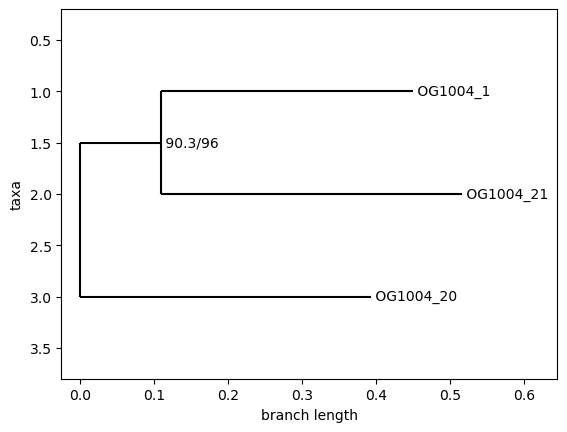

In [32]:
Phylo.draw(tree)